Algumas análises exploratórias
Estas análises são simples mas ajudam a complementar o trabalho, tornando mais visual e podendo gerar alguns insights



In [2]:
%run Flua_job1_tratamento_dados.ipynb


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATA                  2071 non-null   datetime64[ns]
 1   MES                   2071 non-null   int64         
 2   ANO                   2071 non-null   int64         
 3   NUTRICIONISTA         2071 non-null   object        
 4   ID_CASO               1745 non-null   object        
 5   PACIENTE_NOME         2071 non-null   object        
 6   CONSULTA_ESTAGIO      2071 non-null   int64         
 7   OBJETIVO_PACIENTE     1299 non-null   object        
 8   IDIOMA                1451 non-null   object        
 9   STATUS_ATENDIMENTO    2071 non-null   object        
 10  ENGAJAMENTO_STATUS    263 non-null    object        
 11  MENSAGEM_ENVIADA      240 non-null    object        
 12  ENGAJAMENTO_DESFECHO  233 non-null    object        
 13  ENCERRAMENTO_CASO 

/tmp/ipykernel_16388/2784136694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_b1['INTERVENCAO'] = df_b1['MENSAGEM_ENVIADA_RC'].replace({'Personalizada': 1,


   ID_CASO                      PACIENTE_NOME  CONSULTA_ESTAGIO_MAX  \
0    46202                     Lilian Gonçalo                     3   
1   407911   Mariana Campideli Teixeira Silva                     5   
2   407911  Mariana Campideli Teixeira Silva                      3   
3   408015            Patrícia Alves Pinheiro                     4   
4   408052    Thayna Maria Gonçalves Carvalho                     2   

   TOTAL_REALIZADAS  TOTAL_FALTAS  TOTAL_REAGENDAMENTOS  
0                 0             1                     0  
1                 0             2                     0  
2                 2             1                     0  
3                 3             1                     0  
4                 0             3                     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID_CASO       

Quantidade total de atendimentos e por nutricionista

Total de atendimentos: 2071
Atendimentos por nutricionista:
NUTRICIONISTA
Clara        819
Ana Luisa    519
Aline        236
Myliane      229
Juliana      146
Isadora       66
Manoela       56
Name: count, dtype: int64


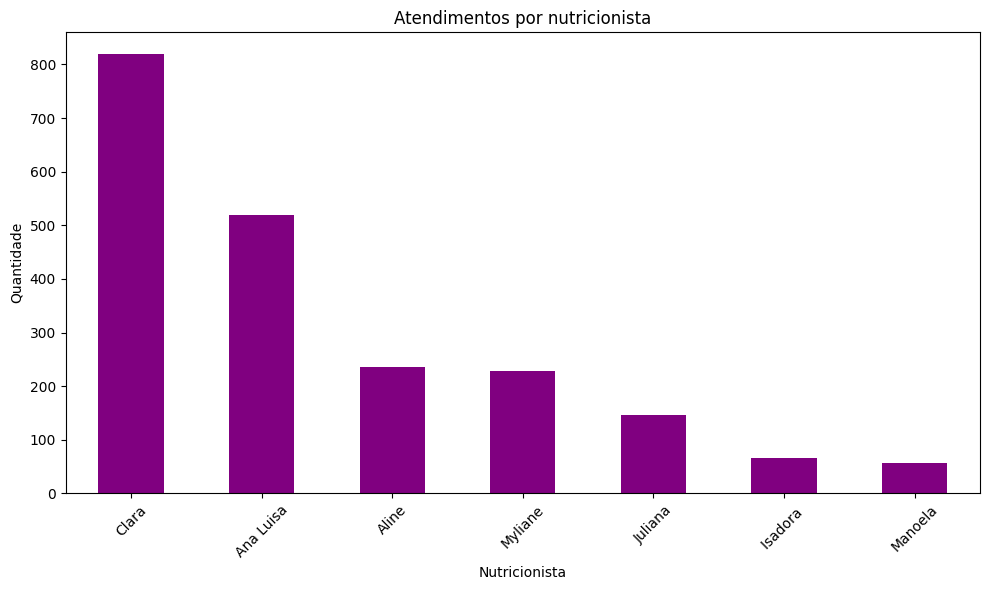

In [5]:
# Total de atendimentos
import matplotlib.pyplot as plt
print(f"Total de atendimentos: {len(df_b1)}")

# Atendimentos por nutricionista
print(f"Atendimentos por nutricionista:\n{df_b1['NUTRICIONISTA'].value_counts()}")

# Gráfico
plt.figure(figsize=(10,6))
df_b1['NUTRICIONISTA'].value_counts().plot(kind='bar', color = 'purple')
plt.title('Atendimentos por nutricionista')
plt.xlabel('Nutricionista')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Atendimentos por mês no ano de 2024

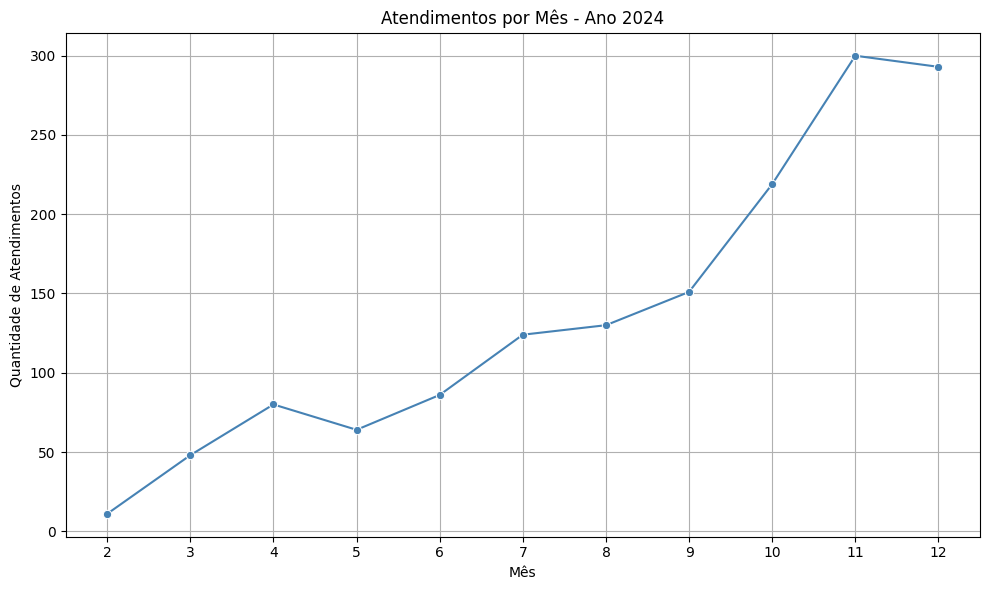

In [6]:
# Filtrar por mês
atend_por_mes = df_b1.groupby(['ANO', 'MES']).size().reset_index(name='ATENDIMENTOS')
#print(atend_por_mes)

# Filtrar apenas o ano de 2024
atend_2024 = atend_por_mes.query('ANO == 2024')
#print(atend_2024)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotando apenas 2024
plt.figure(figsize=(10,6))
sns.lineplot(data=atend_2024, x='MES', y='ATENDIMENTOS', marker='o', color='steelblue')
plt.title('Atendimentos por Mês - Ano 2024')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Atendimentos')
plt.xticks(atend_2024['MES'].unique())  # garantir que os meses apareçam corretamente no eixo X
plt.grid(True)
plt.tight_layout()
plt.show()

Status dos atendimentos

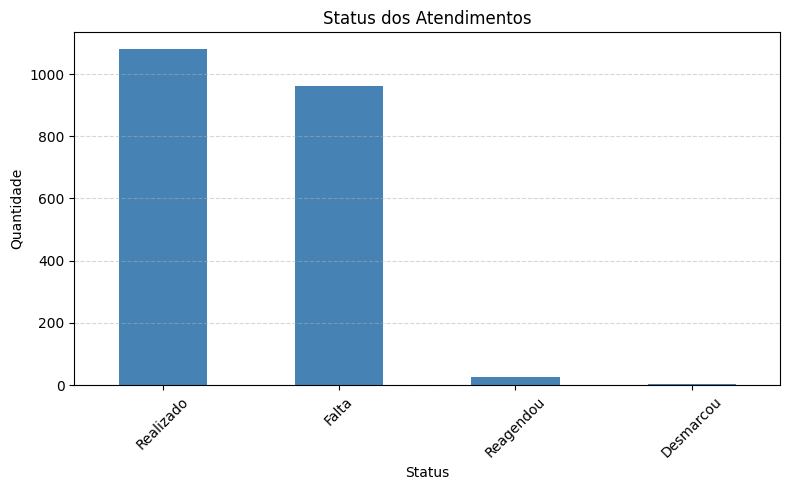

In [7]:
# Dados
status_counts = df_b1['STATUS_ATENDIMENTO_RC'].value_counts()

# Gráfico
plt.figure(figsize=(8,5))
status_counts.plot(kind='bar', color='steelblue')
plt.title('Status dos Atendimentos')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Evolução Temporal dos Status dos atendimentos ao longo do ano de 2024

STATUS_ATENDIMENTO_RC
Realizado    1080
Falta         963
Reagendou      26
Desmarcou       2
Name: count, dtype: int64


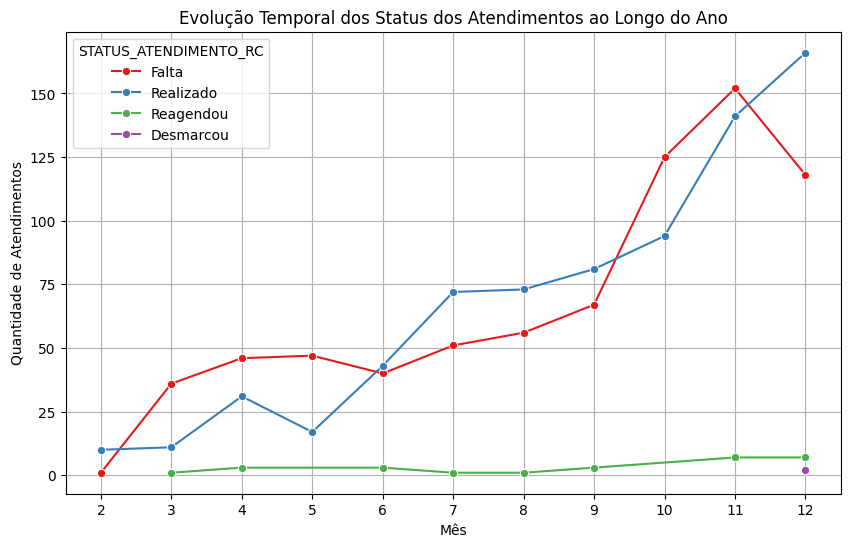

In [8]:
# Dados
status_counts = df_b1['STATUS_ATENDIMENTO_RC'].value_counts()
print(status_counts)

# Filtrar por mês
status_por_mes = df_b1.groupby(['ANO', 'MES', 'STATUS_ATENDIMENTO_RC']).size().reset_index(name='ATENDIMENTOS_RC')

# Filtrar apenas o ano de 2024
status_2024 = status_por_mes.query('ANO == 2024')

# Gráfico apenas 2024
plt.figure(figsize=(10,6))
sns.lineplot(data=status_2024, x='MES', y='ATENDIMENTOS_RC', hue='STATUS_ATENDIMENTO_RC', marker='o', palette='Set1')
plt.title('Evolução Temporal dos Status dos Atendimentos ao Longo do Ano')
plt.ylabel('Quantidade de Atendimentos')
plt.xlabel('Mês')
plt.xticks(status_2024['MES'].unique())  # garantir que os meses apareçam corretamente no eixo X
plt.grid(True)
plt.show()

Objetivos dos Pacientes

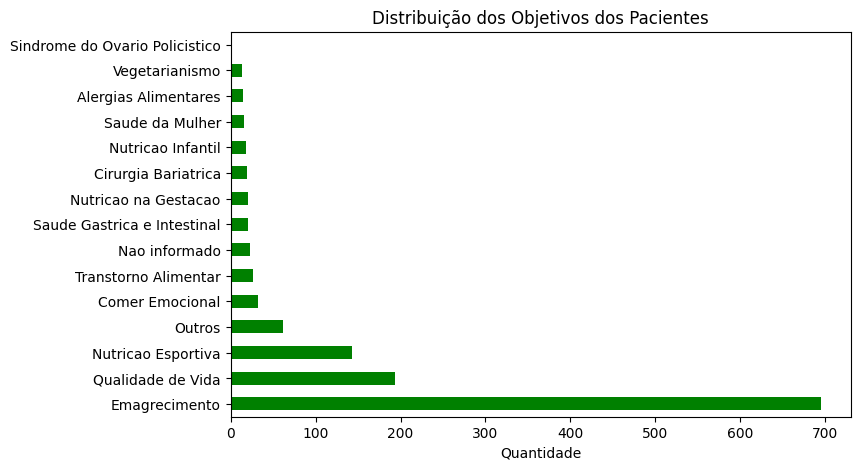

In [9]:
# Dados
objetivos = df_b1['OBJETIVO_PACIENTE_RC'].value_counts()

# Gráfico
plt.figure(figsize=(8,5))
objetivos.plot(kind='barh', color='green')
plt.title('Distribuição dos Objetivos dos Pacientes')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.show()

Engajamento - Tipos e Desfecho

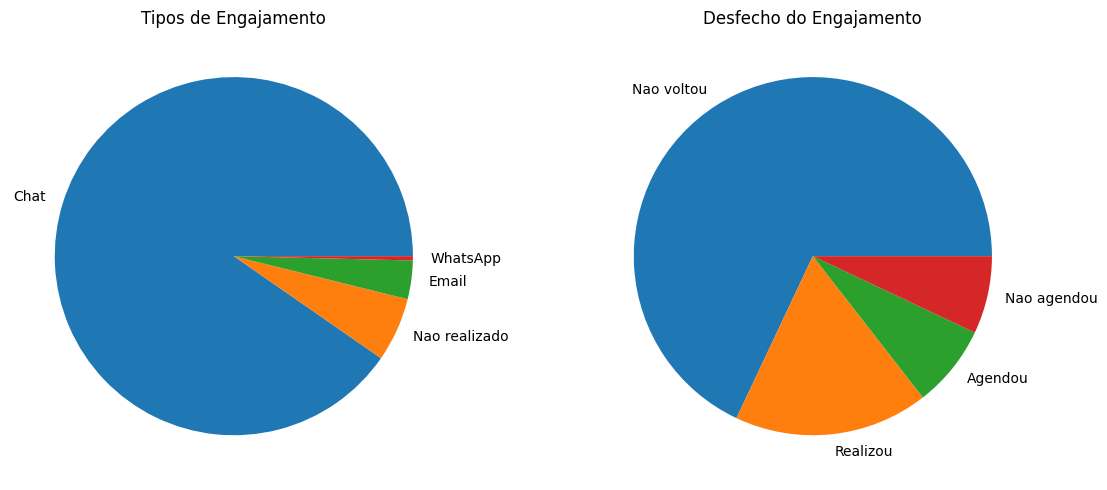

In [10]:
# Cria a figura e os eixos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Gráfico 1 - Tipo de Engajamento
df_b1['ENGAJAMENTO_STATUS_RC'].value_counts().plot(
    kind='pie',
    ax=axs[0]
)
axs[0].set_title('Tipos de Engajamento')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

# Gráfico 2 - Desfecho do Engajamento
df_b1['ENGAJAMENTO_DESFECHO_RC'].value_counts().plot(
    kind='pie',
    ax=axs[1]
)
axs[1].set_title('Desfecho do Engajamento')
axs[1].set_xlabel('')
axs[1].set_ylabel('')


# Ajusta layout para não sobrepor
plt.tight_layout()
plt.show()

Correlação entre Tipo de Engajamento e Desfecho

ENGAJAMENTO_DESFECHO_RC  Agendou  Nao agendou  Nao voltou  Realizou
ENGAJAMENTO_STATUS_RC                                              
Chat                          12           16         150        34
Email                          0            0           3         6
WhatsApp                       0            0           1         0


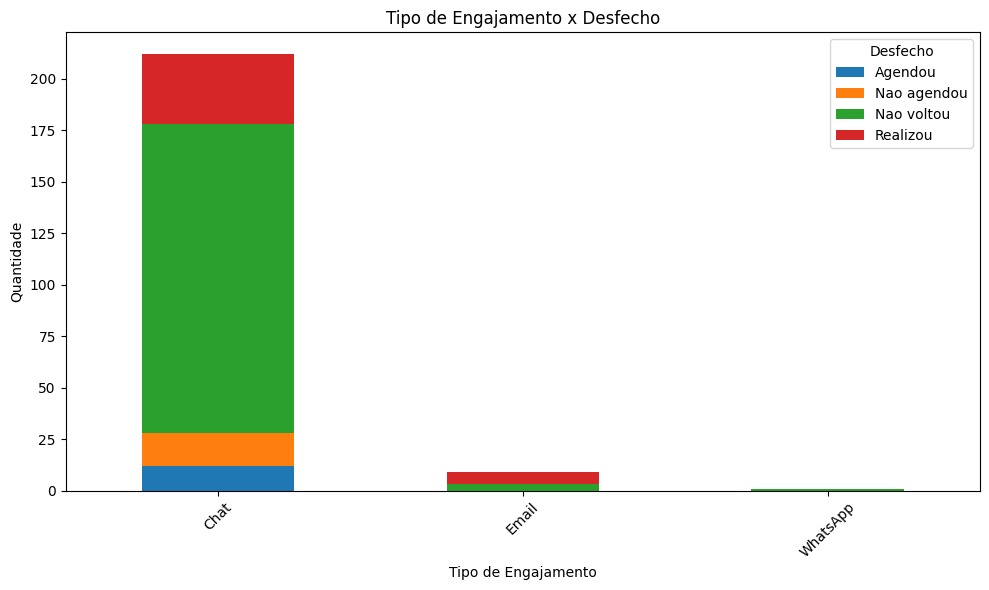

In [11]:
# Tabela de Contingência
tabela = pd.crosstab(df_b1['ENGAJAMENTO_STATUS_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])
print(tabela)

# Visualização com gráfico de barras empilhadas
tabela.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Tipo de Engajamento x Desfecho')
plt.xlabel('Tipo de Engajamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Desfecho')
plt.tight_layout()
plt.show()

Teste de Chi-Quadrado (Tipo de Engajamento x Desfecho) - Verificando Associação Estatística

In [12]:
from scipy.stats import chi2_contingency

# Tabela de Contingência
tabela = pd.crosstab(df_b1['ENGAJAMENTO_STATUS_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])

# Realiza o teste de chi-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

# Imprime os resultados
print(f"Chi-Square Statistic: {chi2: .2f}")
print(f"P-value: {p: .4f} ")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretação
alpha = 0.05
if p < alpha:
    print("As variáveis ENGAJAMENTO_STATUS_RC e ENGAJAMENTO_DESFECHO_RC são associadas.")
else:
    print("As variáveis ENGAJAMENTO_STATUS_RC e ENGAJAMENTO_DESFECHO_RC não são associadas.")

Chi-Square Statistic:  15.66
P-value:  0.0157 
Degrees of Freedom: 6
Expected Frequencies Table:
[[1.14594595e+01 1.52792793e+01 1.47063063e+02 3.81981982e+01]
 [4.86486486e-01 6.48648649e-01 6.24324324e+00 1.62162162e+00]
 [5.40540541e-02 7.20720721e-02 6.93693694e-01 1.80180180e-01]]
As variáveis ENGAJAMENTO_STATUS_RC e ENGAJAMENTO_DESFECHO_RC são associadas.


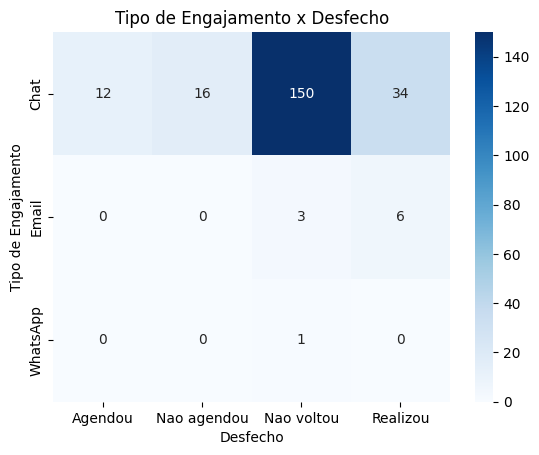

In [13]:
# Tabela de Contingência
tabela = pd.crosstab(df_b1['ENGAJAMENTO_STATUS_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])

sns.heatmap(tabela, annot=True, fmt='d', cmap='Blues')
plt.title('Tipo de Engajamento x Desfecho')
plt.xlabel('Desfecho')
plt.ylabel('Tipo de Engajamento')
plt.show()

Correlação entre Mensagem Enviada e Desfecho

ENGAJAMENTO_DESFECHO_RC     Agendou  Nao agendou  Nao voltou  Realizou
MENSAGEM_ENVIADA_RC                                                   
Padrao                            5            7          53        10
Padrao com material               7            8          69        24
Personalizada                     0            0          14         2
Personalizada com material        0            0           1         0


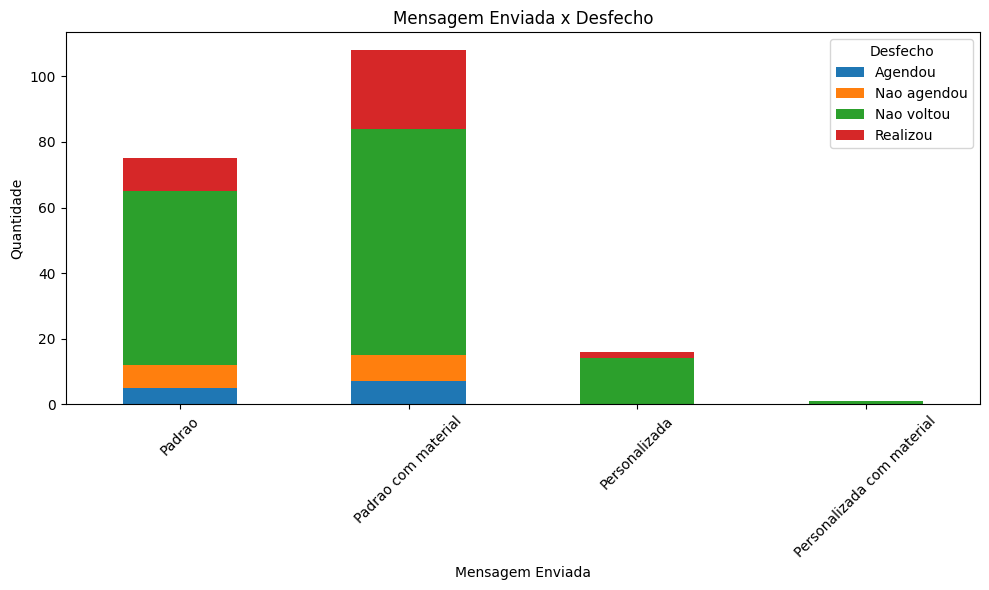

In [14]:
# Tabela de Contingência
tabela = pd.crosstab(df_b1['MENSAGEM_ENVIADA_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])
print(tabela)

# Visualização com gráfico de barras empilhadas
tabela.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Mensagem Enviada x Desfecho')
plt.xlabel('Mensagem Enviada')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Desfecho')
plt.tight_layout()
plt.show()

Teste de Chi-Quadrado (Mensagem Enviada x Desfecho) - Verificando Associação Estatística

In [15]:
# Tabela de Contingência
tabela = pd.crosstab(df_b1['MENSAGEM_ENVIADA_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])

# Realiza o teste de chi-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

# Imprime os resultados
print(f"Chi-Square Statistic: {chi2: .2f}")
print(f"P-value: {p: .4f} ")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretação
alpha = 0.05
if p < alpha:
    print("As variáveis MENSAGEM_ENVIADA_RC e ENGAJAMENTO_DESFECHO_RC são associadas.")
else:
    print("As variáveis MENSAGEM_ENVIADA_RC e ENGAJAMENTO_DESFECHO_RC não são associadas.")

Chi-Square Statistic:  6.53
P-value:  0.6859 
Degrees of Freedom: 9
Expected Frequencies Table:
[[4.5000e+00 5.6250e+00 5.1375e+01 1.3500e+01]
 [6.4800e+00 8.1000e+00 7.3980e+01 1.9440e+01]
 [9.6000e-01 1.2000e+00 1.0960e+01 2.8800e+00]
 [6.0000e-02 7.5000e-02 6.8500e-01 1.8000e-01]]
As variáveis MENSAGEM_ENVIADA_RC e ENGAJAMENTO_DESFECHO_RC não são associadas.


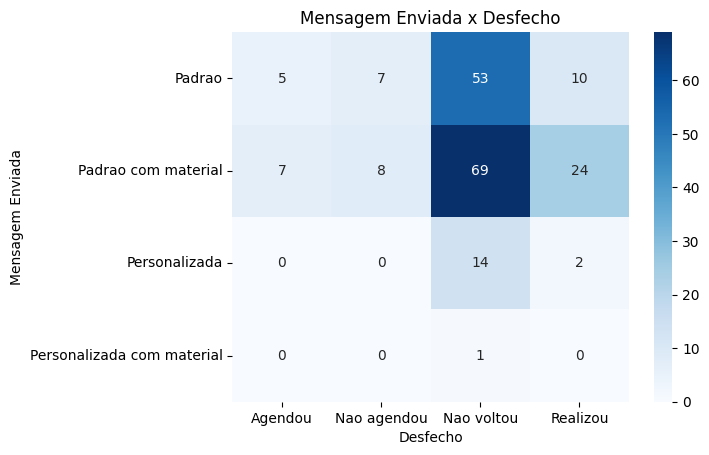

In [16]:
# Tabela de Contingência
tabela = pd.crosstab(df_b1['MENSAGEM_ENVIADA_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])

sns.heatmap(tabela, annot=True, fmt='d', cmap='Blues')
plt.title('Mensagem Enviada x Desfecho')
plt.xlabel('Desfecho')
plt.ylabel('Mensagem Enviada')
plt.show()

# Temos duas hipóteses a serem testadas:
# 1. Poucas pessoas concluem tendo chegado até a sexta consulta realizada
# 2. Para cada consulta realizada, há pelo menos mais uma interação de fracasso (fracasso = Reagendou, Falta)

Testando hipótese 1

Filtro dos que concluíram 

                      Quantidade  Porcentagem (%)
CONSULTA_ESTAGIO_MAX                             
1                            116            64.09
2                             36            19.89
3                             17             9.39
4                              5             2.76
5                              4             2.21
6                              3             1.66


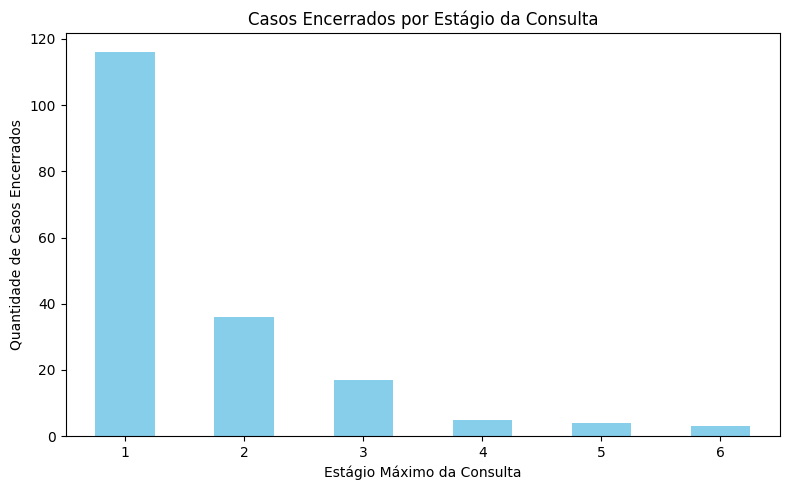

In [23]:
# Filtrar apenas casos encerrados
df_encerrados = df_p3[df_p3['ENCERRAMENTO_CASO_P3'] == 'Caso encerrado']

# Contar quantidade de casos encerrados por CONSULTA_ESTAGIO_MAX
contagem_estagio = df_encerrados['CONSULTA_ESTAGIO_MAX'].value_counts().sort_index()

# Calcular porcentagem
porcentagem_estagio = (contagem_estagio / contagem_estagio.sum() * 100).round(2)

# Exibir tabela
resultado = pd.DataFrame({
    'Quantidade': contagem_estagio,
    'Porcentagem (%)': porcentagem_estagio
})
print(resultado)

# Gráfico comparativo
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
contagem_estagio.plot(kind='bar', color='skyblue')
plt.title('Casos Encerrados por Estágio da Consulta')
plt.xlabel('Estágio Máximo da Consulta')
plt.ylabel('Quantidade de Casos Encerrados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
# Filtrar apenas casos encerrados
df_encerrados = df_p3[df_p3['ENCERRAMENTO_CASO_P3'] == 'Caso encerrado']

# Filtrar apenas casos em andamento
df_andamento = df_p3[df_p3['ENCERRAMENTO_CASO_P3'] != 'Caso encerrado']




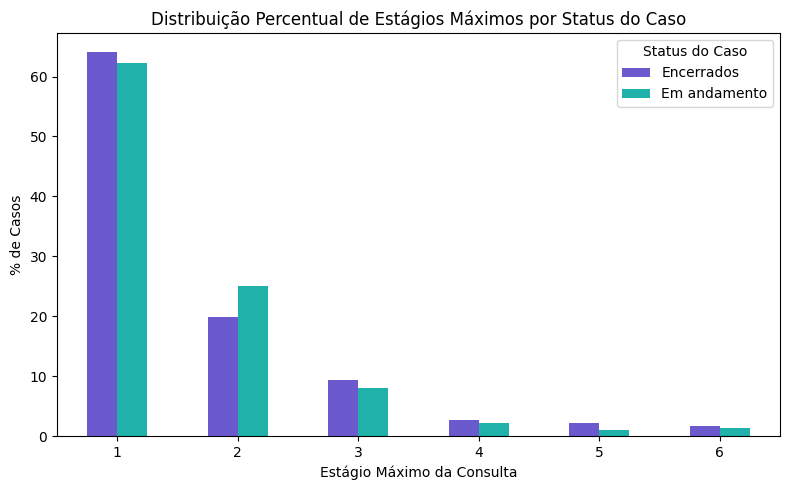

In [27]:
# Calcular a distribuição percentual de CONSULTA_ESTAGIO_MAX para casos encerrados
percent_encerrados = df_encerrados['CONSULTA_ESTAGIO_MAX'].value_counts(normalize=True).sort_index() * 100

# Calcular a distribuição percentual de CONSULTA_ESTAGIO_MAX para casos em andamento
percent_andamento = df_andamento['CONSULTA_ESTAGIO_MAX'].value_counts(normalize=True).sort_index() * 100

# Unir em um DataFrame para plotar lado a lado
df_percent = pd.DataFrame({
    'Encerrados': percent_encerrados,
    'Em andamento': percent_andamento
}).fillna(0)

# Plotar gráfico de colunas lado a lado
ax = df_percent.plot(kind='bar', figsize=(8,5), color=['#6a5acd', '#20b2aa'])
plt.title('Distribuição Percentual de Estágios Máximos por Status do Caso')
plt.xlabel('Estágio Máximo da Consulta')
plt.ylabel('% de Casos')
plt.xticks(rotation=0)
plt.legend(title='Status do Caso')
plt.tight_layout()
plt.show()

In [30]:
# Agrupar por CONSULTA_ESTAGIO_MAX e calcular média e desvio padrão de TOTAL_INTERACOES
df_o2 = df_p3.groupby('CONSULTA_ESTAGIO_MAX')['TOTAL_INTERACOES'].agg(['mean', 'std']).reset_index()

# Renomear as colunas para português
df_o2.columns = ['CONSULTA_ESTAGIO_MAX', 'Média_TOTAL_INTERACOES', 'Desvio_Padrao_TOTAL_INTERACOES']

# Exibir a tabela
df_o2

,CONSULTA_ESTAGIO_MAX,Média_TOTAL_INTERACOES,Desvio_Padrao_TOTAL_INTERACOES
0,1,1.053333,0.243856
1,2,2.038314,0.454113
2,3,2.966292,0.730029
3,4,3.600000,1.000000
4,5,4.615385,1.260850
5,6,5.466667,1.187234


In [31]:
# Agrupar por CONSULTA_ESTAGIO_MAX e calcular as médias e desvio padrão
df_o2 = df_p3.groupby('CONSULTA_ESTAGIO_MAX').agg(
    Média_TOTAL_INTERACOES=('TOTAL_INTERACOES', 'mean'),
    Desvio_Padrao_TOTAL_INTERACOES=('TOTAL_INTERACOES', 'std'),
    Média_TOTAL_REALIZADAS=('TOTAL_REALIZADAS', 'mean'),
    Média_TOTAL_FALTAS=('TOTAL_FALTAS', 'mean'),
    Média_TOTAL_REAGENDAMENTOS=('TOTAL_REAGENDAMENTOS', 'mean')
).reset_index()

# Exibir a tabela
df_o2

,CONSULTA_ESTAGIO_MAX,Média_TOTAL_INTERACOES,Desvio_Padrao_TOTAL_INTERACOES,Média_TOTAL_REALIZADAS,Média_TOTAL_FALTAS,Média_TOTAL_REAGENDAMENTOS
0,1,1.053333,0.243856,0.414815,0.625185,0.013333
1,2,2.038314,0.454113,1.229885,0.789272,0.019157
2,3,2.966292,0.730029,1.831461,1.101124,0.033708
3,4,3.600000,1.000000,2.720000,0.840000,0.040000
4,5,4.615385,1.260850,3.153846,1.461538,0.000000
5,6,5.466667,1.187234,3.800000,1.666667,0.000000


In [32]:
# Agrupar por CONSULTA_ESTAGIO_MAX apenas para casos encerrados e calcular as médias e desvio padrão
df_o2_encerrados = df_encerrados.groupby('CONSULTA_ESTAGIO_MAX').agg(
    Média_TOTAL_INTERACOES=('TOTAL_INTERACOES', 'mean'),
    Desvio_Padrao_TOTAL_INTERACOES=('TOTAL_INTERACOES', 'std'),
    Média_TOTAL_REALIZADAS=('TOTAL_REALIZADAS', 'mean'),
    Média_TOTAL_FALTAS=('TOTAL_FALTAS', 'mean'),
    Média_TOTAL_REAGENDAMENTOS=('TOTAL_REAGENDAMENTOS', 'mean')
).reset_index()

# Exibir a tabela
df_o2_encerrados

,CONSULTA_ESTAGIO_MAX,Média_TOTAL_INTERACOES,Desvio_Padrao_TOTAL_INTERACOES,Média_TOTAL_REALIZADAS,Média_TOTAL_FALTAS,Média_TOTAL_REAGENDAMENTOS
0,1,1.068966,0.286634,0.267241,0.775862,0.025862
1,2,2.027778,0.291411,1.083333,0.916667,0.027778
2,3,2.941176,0.242536,1.882353,1.058824,0.000000
3,4,3.200000,1.095445,2.200000,0.800000,0.200000
4,5,5.250000,0.500000,2.750000,2.500000,0.000000
5,6,6.000000,0.000000,4.000000,2.000000,0.000000


In [35]:
# Soma total de faltas
total_faltas = df_p3['TOTAL_FALTAS'].sum()
print("Total de Faltas:", total_faltas)

# Soma total de consultas realizadas
total_realizadas = df_p3['TOTAL_REALIZADAS'].sum()
print("Total de Consultas Realizadas:", total_realizadas)

print("Proporção de Consultas Realizadas:", total_faltas / total_realizadas)

Total de Faltas: 791
Total de Consultas Realizadas: 930
Proporção de Consultas Realizadas: 0.8505376344086022


In [42]:
# Agrupar por CONSULTA_ESTAGIO_MAX apenas para casos em andamento e calcular as médias e desvio padrão
df_o2_andamento = df_andamento.groupby('CONSULTA_ESTAGIO_MAX').agg(
    Média_TOTAL_INTERACOES=('TOTAL_INTERACOES', 'mean'),
    Desvio_Padrao_TOTAL_INTERACOES=('TOTAL_INTERACOES', 'std'),
    Média_TOTAL_REALIZADAS=('TOTAL_REALIZADAS', 'mean'),
    Média_TOTAL_FALTAS=('TOTAL_FALTAS', 'mean'),
    Média_TOTAL_REAGENDAMENTOS=('TOTAL_REAGENDAMENTOS', 'mean')
).reset_index()

# Exibir a tabela
df_o2_andamento

,CONSULTA_ESTAGIO_MAX,Média_TOTAL_INTERACOES,Desvio_Padrao_TOTAL_INTERACOES,Média_TOTAL_REALIZADAS,Média_TOTAL_FALTAS,Média_TOTAL_REAGENDAMENTOS
0,1,1.050089,0.234167,0.445438,0.593918,0.010733
1,2,2.040000,0.475470,1.253333,0.768889,0.017778
2,3,2.972222,0.804428,1.819444,1.111111,0.041667
3,4,3.700000,0.978721,2.850000,0.850000,0.000000
4,5,4.333333,1.414214,3.333333,1.000000,0.000000
5,6,5.333333,1.302678,3.750000,1.583333,0.000000


In [43]:
# Criar uma coluna com a última data disponível para cada ID_CASO em df_b1
ultima_data = df_b1.groupby('ID_CASO')['DATA'].max().reset_index()
ultima_data = ultima_data.rename(columns={'DATA': 'ULTIMA_DATA'})

# Fazer o merge com df_p3 para criar df_o1
df_o1 = df_p3.merge(ultima_data, on='ID_CASO', how='left')

# Exibir as primeiras linhas
df_o1.head()

,ID_CASO,PACIENTE_NOME,NUTRI,CONSULTA_ESTAGIO_MAX,TOTAL_REALIZADAS,TOTAL_FALTAS,TOTAL_REAGENDAMENTOS,TOTAL_INTERACOES,ENCERRAMENTO_CASO_P3,MES,ULTIMA_DATA
0,46202,Lilian Gonçalo,Clara,3,0,1,0,1,NaN,2,2025-02-13
1,407911,Mariana Campideli Teixeira Silva,Ana Luisa,5,2,3,0,5,Caso encerrado,5,2024-05-06
2,408015,Patrícia Alves Pinheiro,Ana Luisa,4,3,1,0,4,Caso encerrado,3,2024-03-28
3,408052,Thayna Maria Gonçalves Carvalho,Ana Luisa,2,0,3,0,3,Caso encerrado,4,2024-04-29
4,408222,Samira Alves Vitor,Ana Luisa,2,1,1,0,2,Caso encerrado,3,2024-03-19


In [44]:
# Garantir que df_o1 tem a coluna MES (caso não tenha, traga do df_b1)
if 'MES' not in df_o1.columns:
    df_o1 = df_o1.merge(
        df_b1[['ID_CASO', 'MES']],
        on='ID_CASO',
        how='left'
    )

# Criar a tabela dinâmica: distribuição mensal de CONSULTA_ESTAGIO_MAX por ENCERRAMENTO_CASO_P3
tabela_mensal_o1 = pd.pivot_table(
    df_o1,
    index=['MES', 'CONSULTA_ESTAGIO_MAX'],
    columns='ENCERRAMENTO_CASO_P3',
    values='ID_CASO',
    aggfunc='count',
    fill_value=0
).reset_index()

# Exibir a tabela
tabela_mensal_o1

ENCERRAMENTO_CASO_P3,MES,CONSULTA_ESTAGIO_MAX,Caso encerrado
0,1,1,4
1,1,2,1
2,2,1,4
3,2,2,1
4,3,1,6
5,3,2,2
6,3,4,1
7,4,1,17
8,4,2,4
9,5,1,10


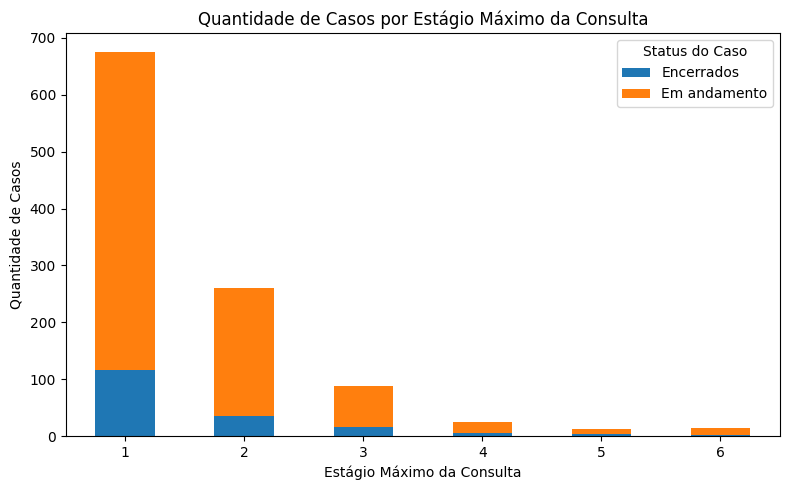

In [48]:
import matplotlib.pyplot as plt

# Separar os dados
df_encerrados = df_o1[df_o1['ENCERRAMENTO_CASO_P3'] == 'Caso encerrado']
df_andamento = df_o1[df_o1['ENCERRAMENTO_CASO_P3'] != 'Caso encerrado']

# Crosstab: quantidade por estágio para cada status
crosstab = pd.DataFrame({
    'Encerrados': df_encerrados['CONSULTA_ESTAGIO_MAX'].value_counts().sort_index(),
    'Em andamento': df_andamento['CONSULTA_ESTAGIO_MAX'].value_counts().sort_index()
}).fillna(0).astype(int)

# Plot
crosstab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8,5))
plt.title('Quantidade de Casos por Estágio Máximo da Consulta')
plt.xlabel('Estágio Máximo da Consulta')
plt.ylabel('Quantidade de Casos')
plt.legend(title='Status do Caso')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()